In [85]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

import warnings
warnings.filterwarnings("ignore")

In [86]:
df1=pd.read_csv("telecom_churn_data.csv")

In [87]:
df = pd.read_csv("telecom_churn_data.csv")

In [88]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [89]:
df['arpu_6_7']=df[['arpu_6','arpu_7']].sum(axis=1)

In [90]:
perc_70 = (df['arpu_6_7'].quantile(0.7))
df=df[df['arpu_6_7']>perc_70]

In [91]:
df.shape

(30000, 227)

In [92]:
df['churn'] = np.where(((df['total_ic_mou_9'] == 0.00) | (df['total_og_mou_9'] == 0.00)) & ((df['vol_2g_mb_9'] == 0.00) | (df['vol_3g_mb_9'] == 0.00)), 1, 0)

In [93]:
df.head(1)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_6_7,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.18,1349.85,3171.48,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.3,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.5,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,

In [94]:
df['churn'].value_counts()
# print(df['churn_flag'].value_counts()/df.shape[0])

0    26885
1     3115
Name: churn, dtype: int64

In [95]:
import plotly.graph_objs as go
import plotly.offline as py

In [96]:
x=df['churn'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="churn distribution",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

###### Let's drop all features related to churn phase i.e. 9th month

In [97]:
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1)

###### we can see that there are many missing values and every feature has to handled differently 

In [98]:
len(df1['std_ic_t2o_mou_8'].value_counts())

1

In [99]:
#unique=[i for i in df.columns if len(df[i].value_counts)==1]
unique_stats = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'unique'})
print(unique_stats[unique_stats['unique'] == 1])

print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['unique'] == 1]))

                 feature  unique
1              circle_id       1
2         loc_og_t2o_mou       1
3         std_og_t2o_mou       1
4         loc_ic_t2o_mou       1
5   last_date_of_month_6       1
6   last_date_of_month_7       1
7   last_date_of_month_8       1
47      std_og_t2c_mou_6       1
48      std_og_t2c_mou_7       1
49      std_og_t2c_mou_8       1
86      std_ic_t2o_mou_6       1
87      std_ic_t2o_mou_7       1
88      std_ic_t2o_mou_8       1
13 features with a single unique value.



In [100]:
df = df.drop(columns = list(unique_stats[unique_stats['unique'] == 1]['feature']))

In [101]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 7 to 99998
Data columns (total 160 columns):
mobile_number               int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            

In [102]:
for i in df.columns:
  if df[i].isnull().sum()!=0:
    print(i,"--:",df[i].isnull().sum(),"--percentage : ",df[i].isnull().sum()/len(df)*100,'--',df[i].dtypes)

onnet_mou_6 --: 314 --percentage :  1.0466666666666669 -- float64
onnet_mou_7 --: 334 --percentage :  1.1133333333333333 -- float64
onnet_mou_8 --: 1024 --percentage :  3.4133333333333336 -- float64
offnet_mou_6 --: 314 --percentage :  1.0466666666666669 -- float64
offnet_mou_7 --: 334 --percentage :  1.1133333333333333 -- float64
offnet_mou_8 --: 1024 --percentage :  3.4133333333333336 -- float64
roam_ic_mou_6 --: 314 --percentage :  1.0466666666666669 -- float64
roam_ic_mou_7 --: 334 --percentage :  1.1133333333333333 -- float64
roam_ic_mou_8 --: 1024 --percentage :  3.4133333333333336 -- float64
roam_og_mou_6 --: 314 --percentage :  1.0466666666666669 -- float64
roam_og_mou_7 --: 334 --percentage :  1.1133333333333333 -- float64
roam_og_mou_8 --: 1024 --percentage :  3.4133333333333336 -- float64
loc_og_t2t_mou_6 --: 314 --percentage :  1.0466666666666669 -- float64
loc_og_t2t_mou_7 --: 334 --percentage :  1.1133333333333333 -- float64
loc_og_t2t_mou_8 --: 1024 --percentage :  3.413

In [103]:
df.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            

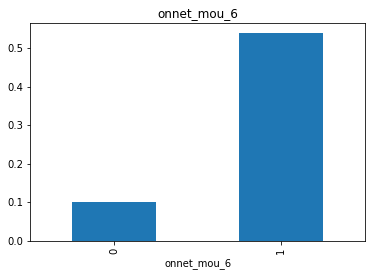

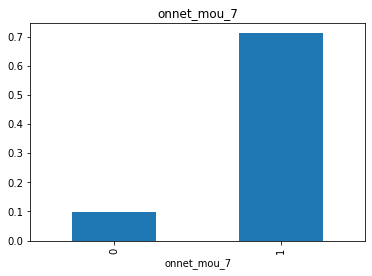

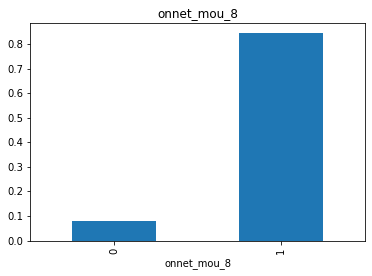

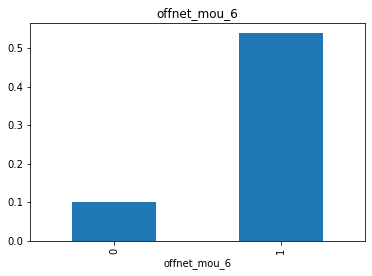

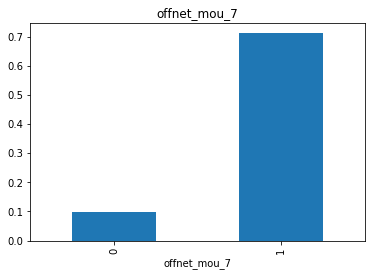

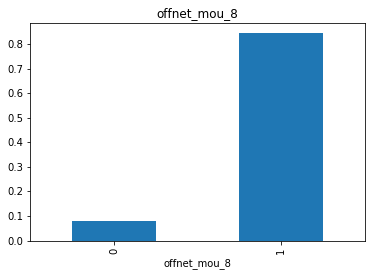

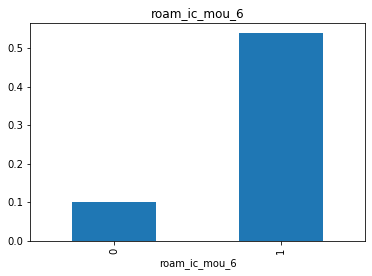

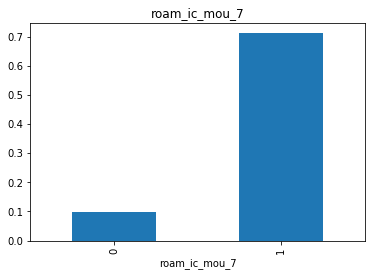

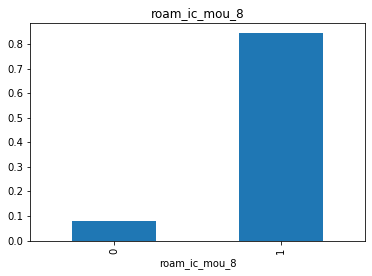

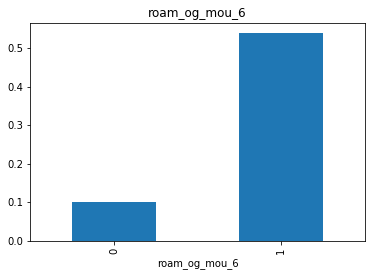

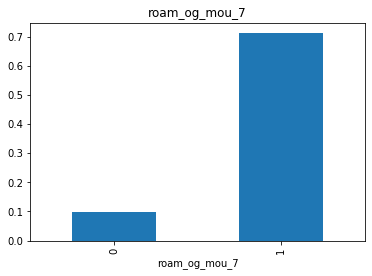

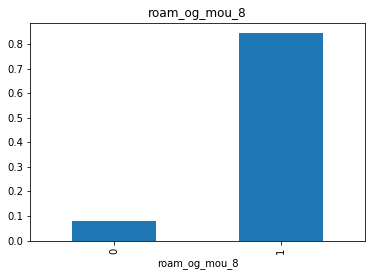

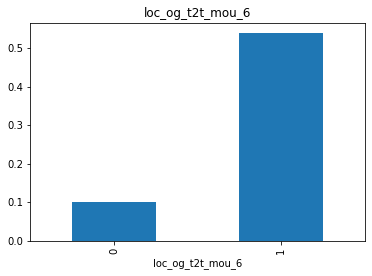

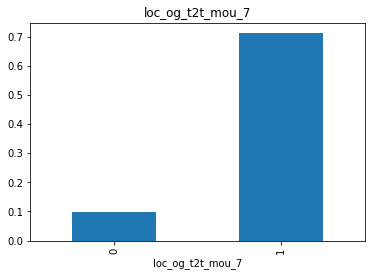

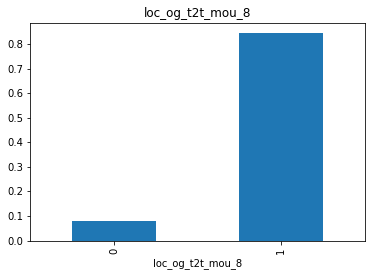

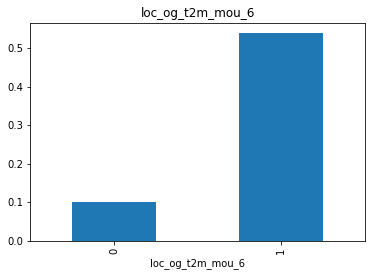

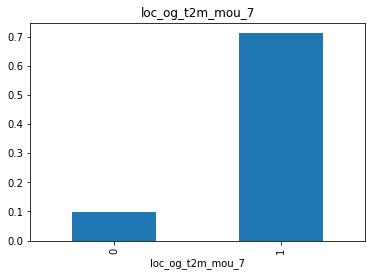

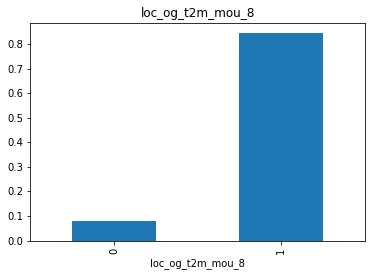

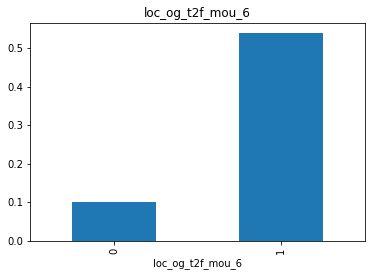

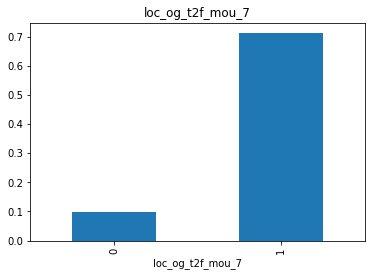

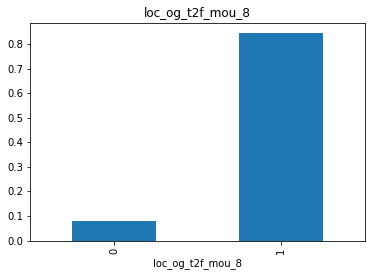

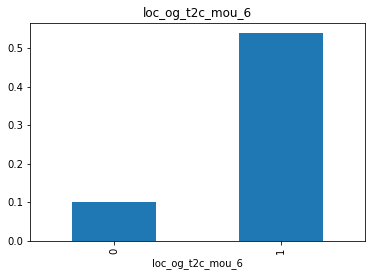

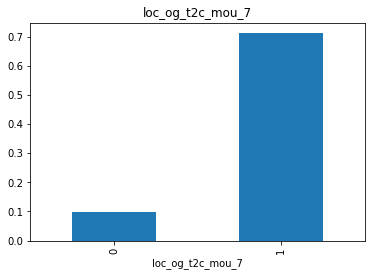

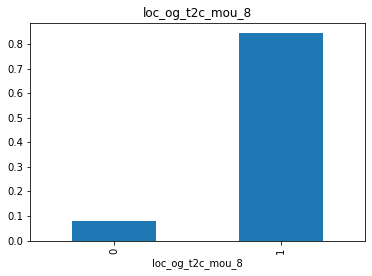

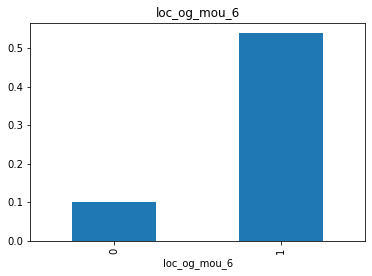

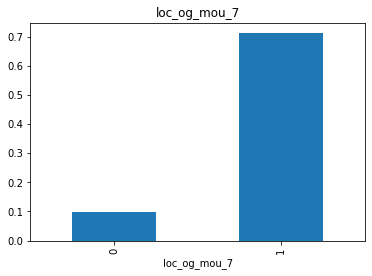

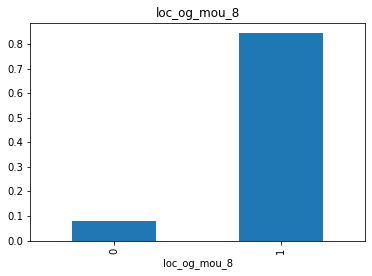

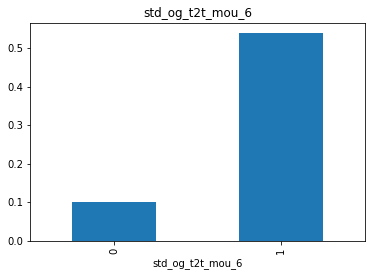

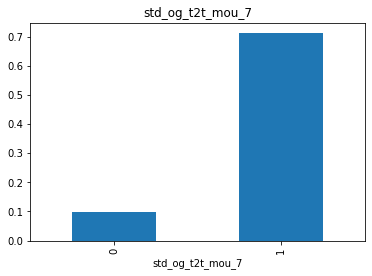

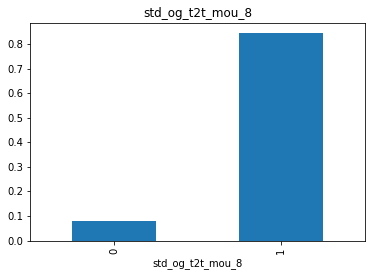

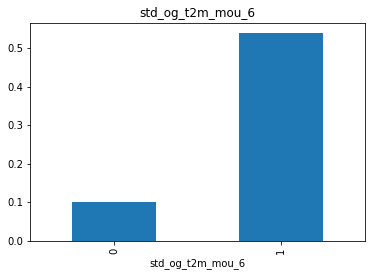

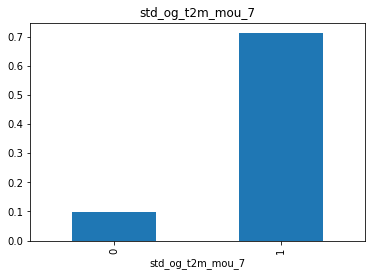

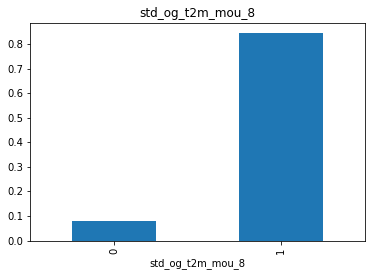

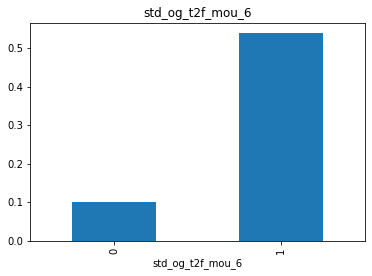

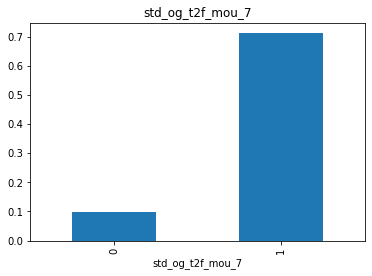

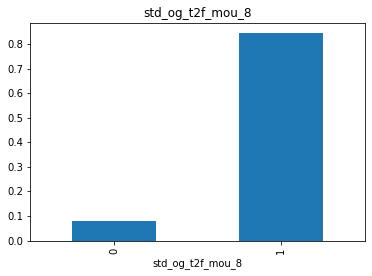

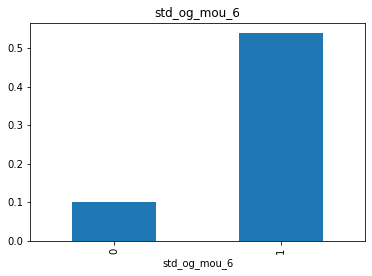

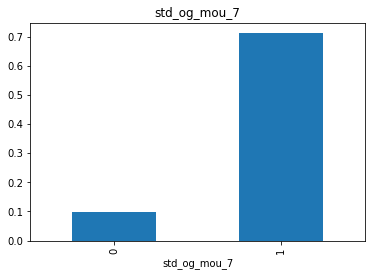

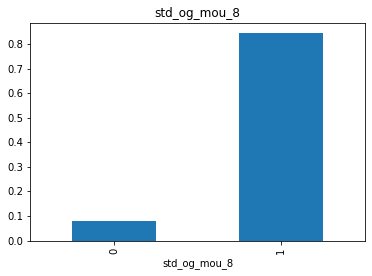

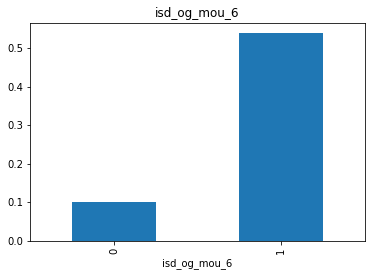

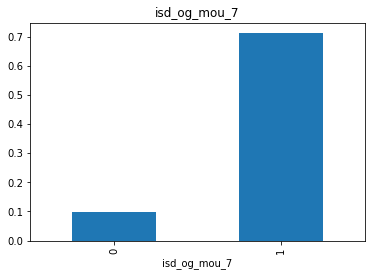

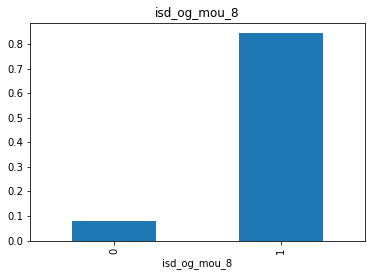

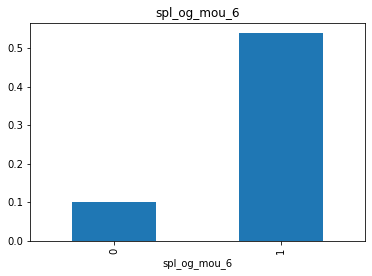

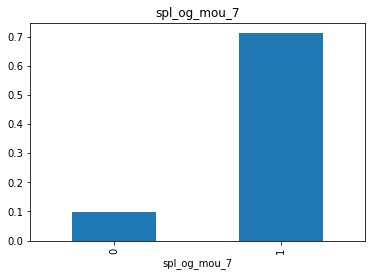

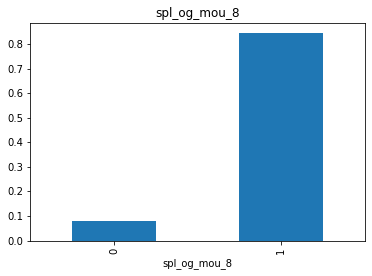

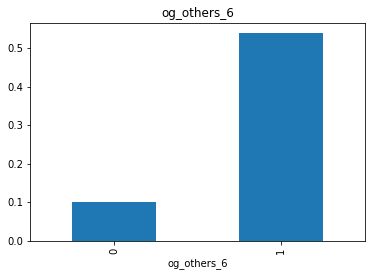

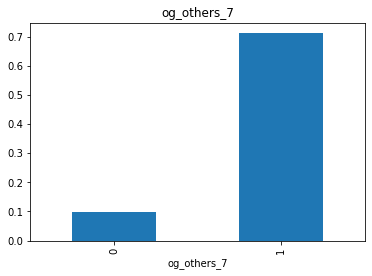

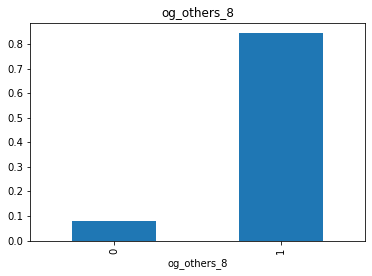

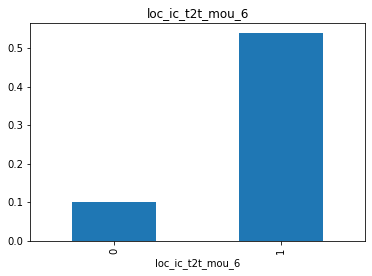

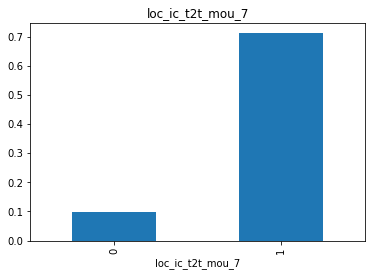

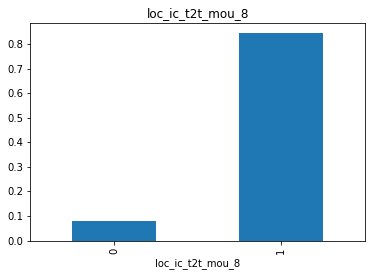

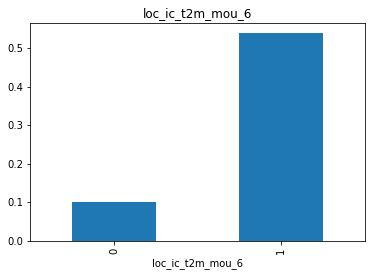

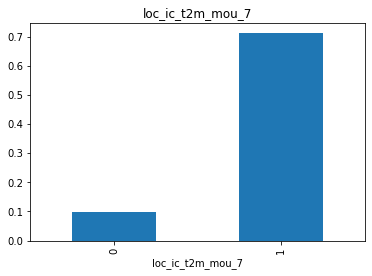

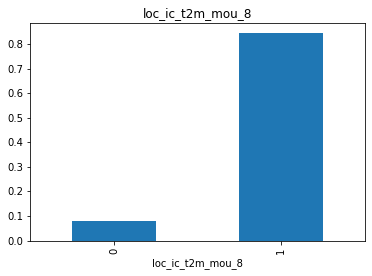

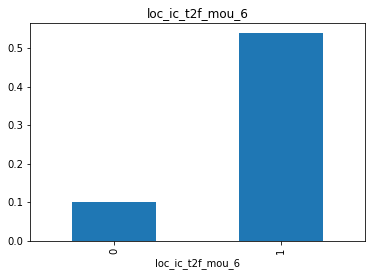

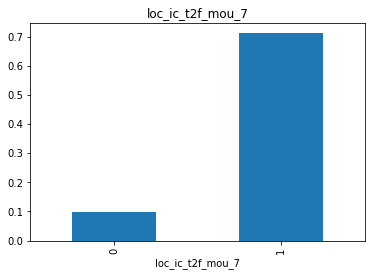

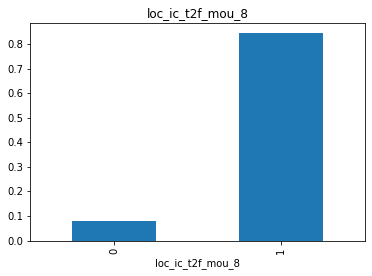

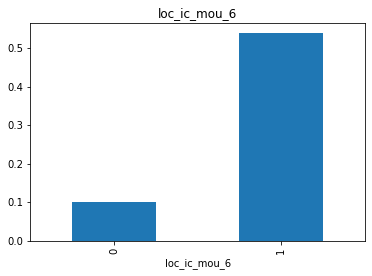

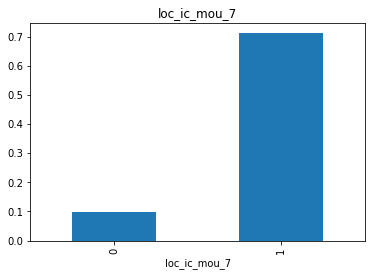

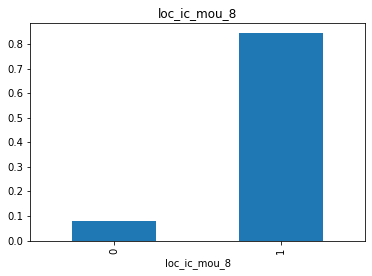

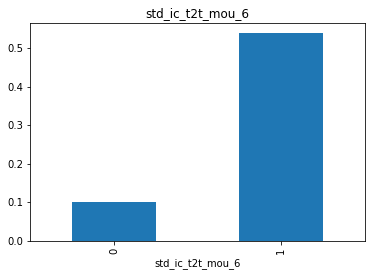

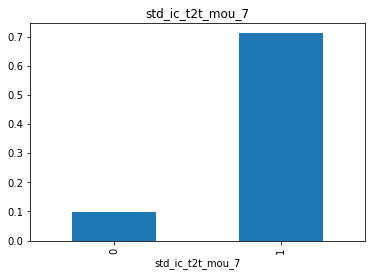

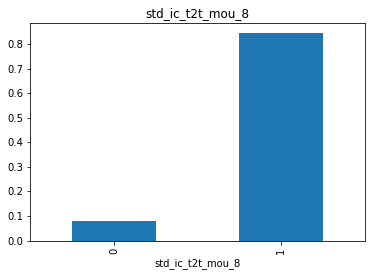

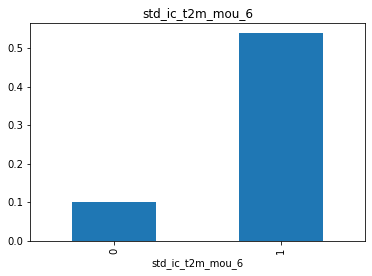

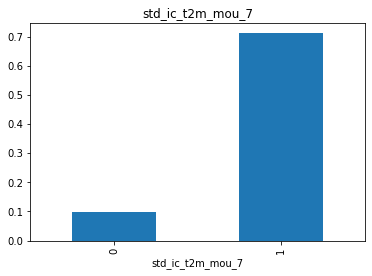

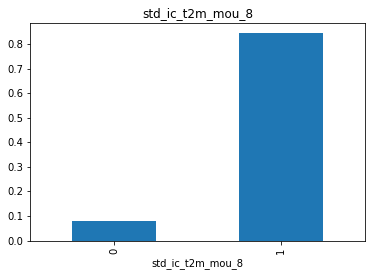

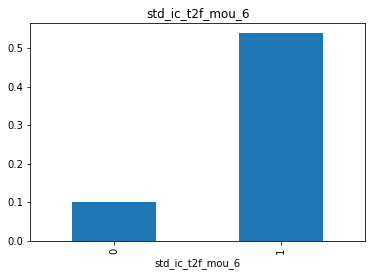

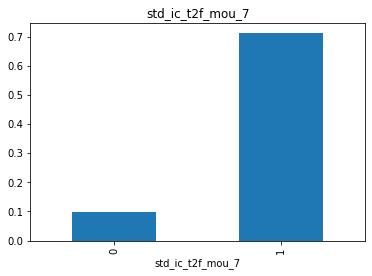

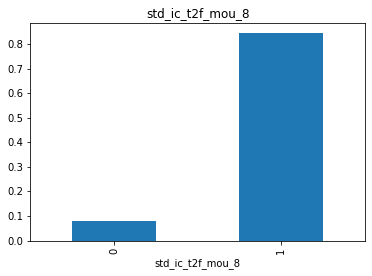

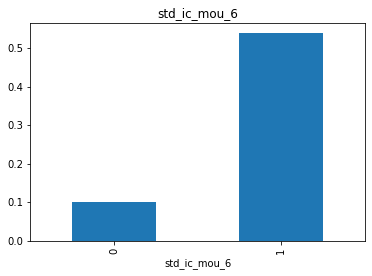

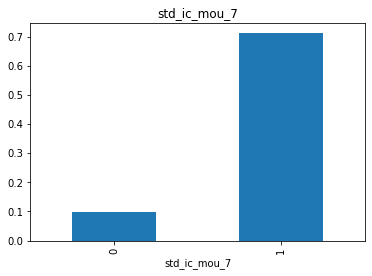

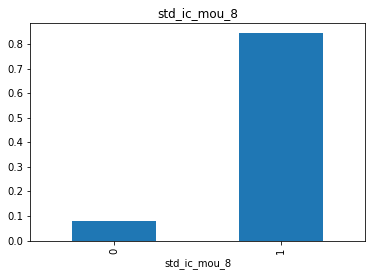

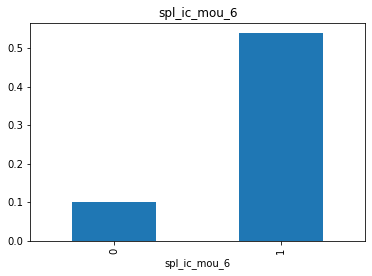

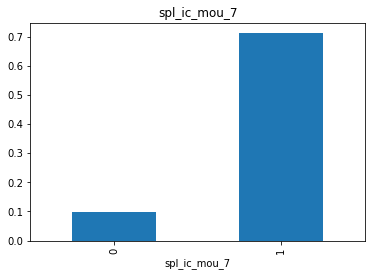

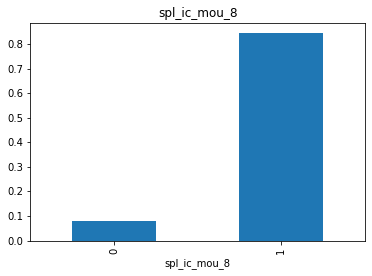

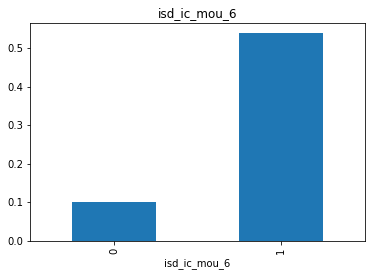

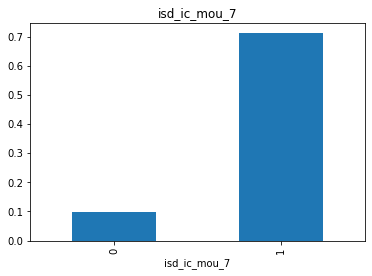

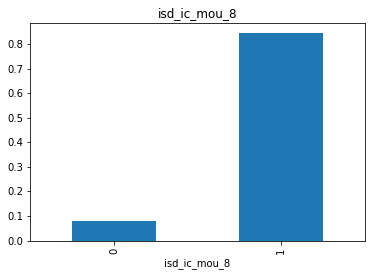

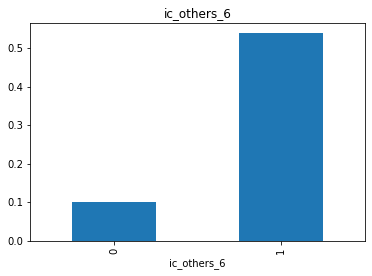

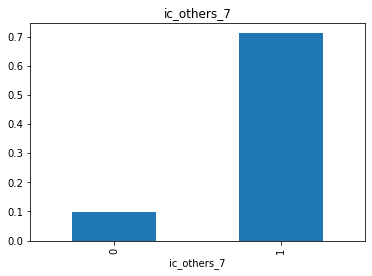

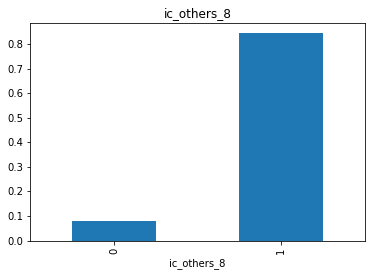

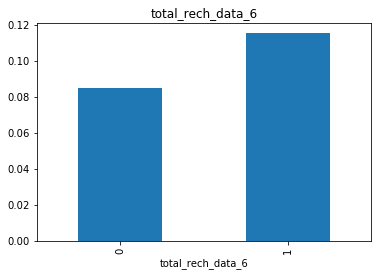

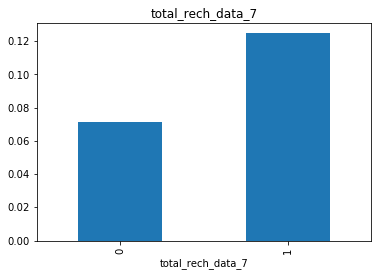

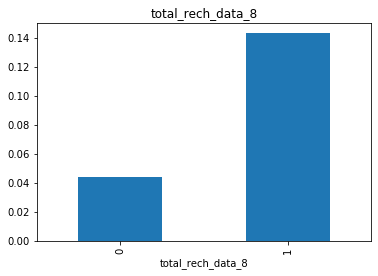

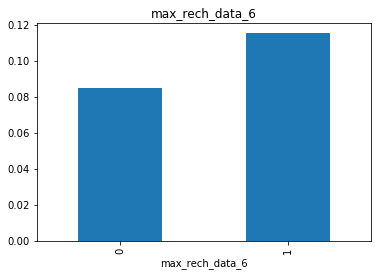

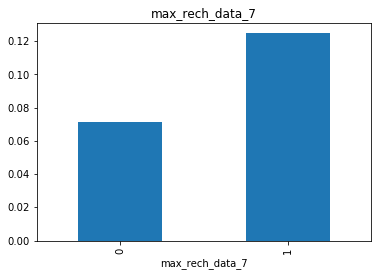

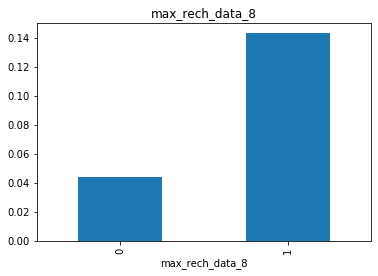

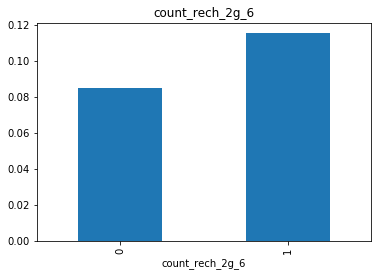

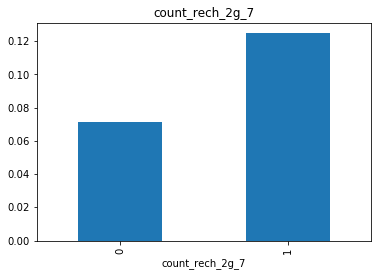

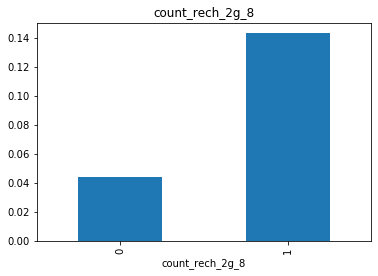

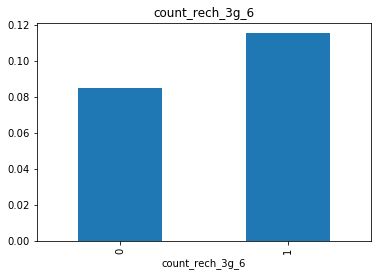

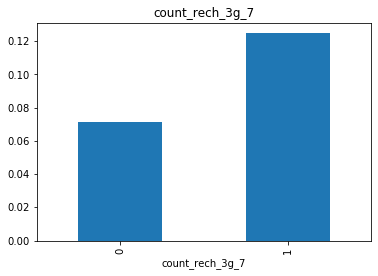

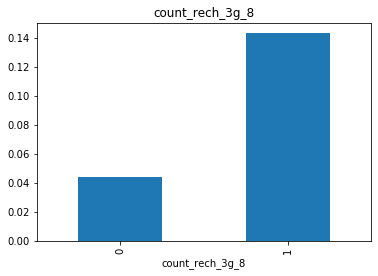

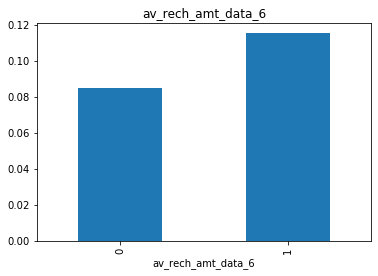

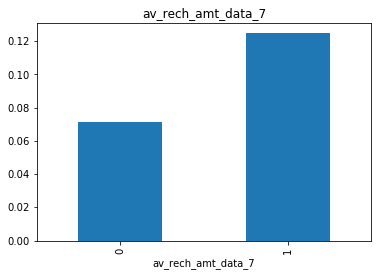

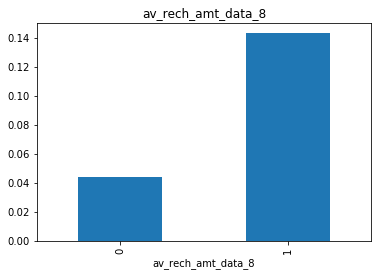

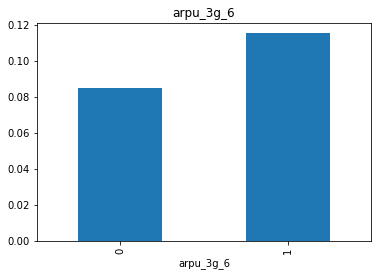

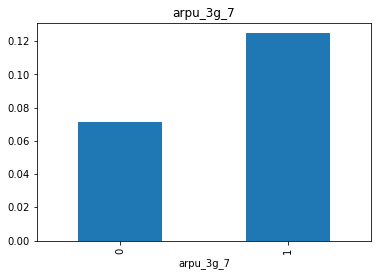

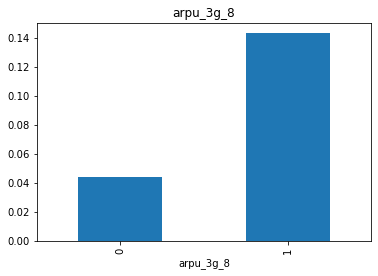

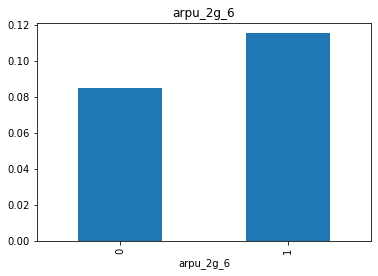

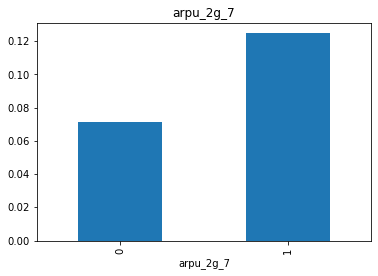

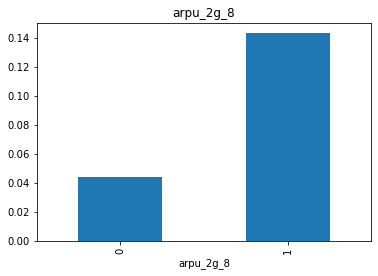

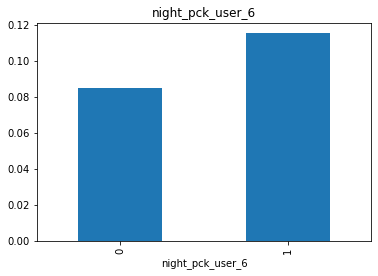

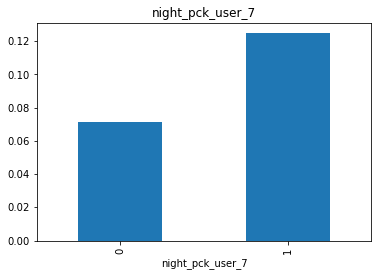

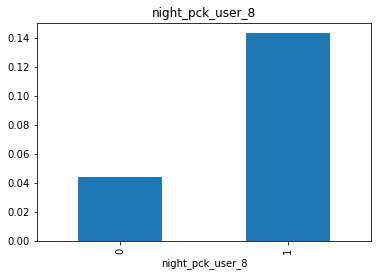

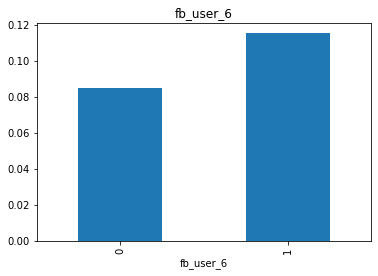

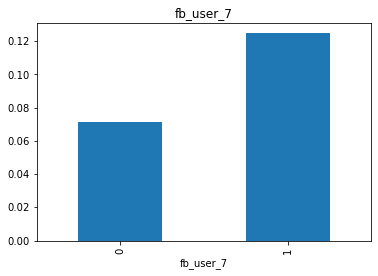

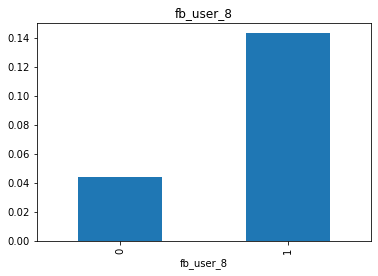

In [104]:
#features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean churn where the information is missing or present
    data.groupby(feature)['churn'].mean().plot.bar()
    plt.title(feature)
    plt.show()

#### from above data we can see that upto k_others_8 all miising data is directly related to churning 
##### Which means they stopped using all servivces like incoming,outgoing,isd,spl,local,roaming services and stopped recharging.so so we can replace them with value zero as they stopped using them
##### and after K_others columns where miising data rate is almost  above 60% as we can see that churning rate is almost similar between data missing values and non missing values so simply we cannot replace NaN values with zero

In [105]:
df.groupby('fb_user_6')['churn'].value_counts()

fb_user_6  churn
0.0        0        1048
           1         113
1.0        0        9515
           1         871
Name: churn, dtype: int64

In [106]:
pd.set_option('display.max_rows', None)

In [107]:
df.groupby('total_rech_data_7')['churn'].value_counts()

total_rech_data_7  churn
1.0                0        5195
                   1         381
2.0                0        2392
                   1         195
3.0                0        1017
                   1          81
4.0                0         669
                   1          52
5.0                0         475
                   1          35
6.0                0         317
                   1          27
7.0                0         214
                   1          14
8.0                0         168
                   1          11
9.0                0         108
                   1           7
10.0               0          83
                   1           9
11.0               0          67
                   1           8
12.0               0          49
                   1           3
13.0               0          23
                   1           3
14.0               0          27
                   1           4
15.0               0          19
                  

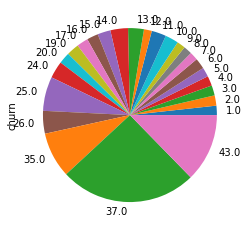

In [108]:
df.groupby('total_rech_data_7')['churn'].mean().plot.pie()

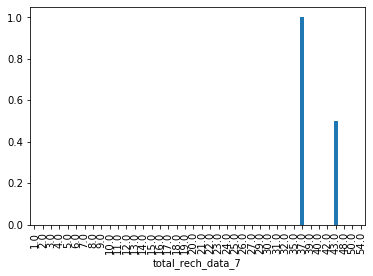

In [109]:
df.groupby('total_rech_data_7')['churn'].median().plot.bar()

In [110]:
df1['churn'] = np.where(((df1['total_ic_mou_9'] == 0.00) | (df1['total_og_mou_9'] == 0.00)) & ((df1['vol_2g_mb_9'] == 0.00) | (df1['vol_3g_mb_9'] == 0.00)), 1, 0)

##### from above graphs we can see that all NAN values are raled to CHURNING customes which means they stopped using all servivces like incoming,outgoing,isd,spl,local,roaming services and stopped recharging.
##### and we can see that columns or features 

In [111]:
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_6_7,churn
count,3.000000e+04,30000.000000,30000.000000,30000.000000,29686.000000,29666.000000,28976.000000,29686.00000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.00000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,30000.000000,30000.000000,30000.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,30000.000000,30000.000000,30000.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000

# EDA

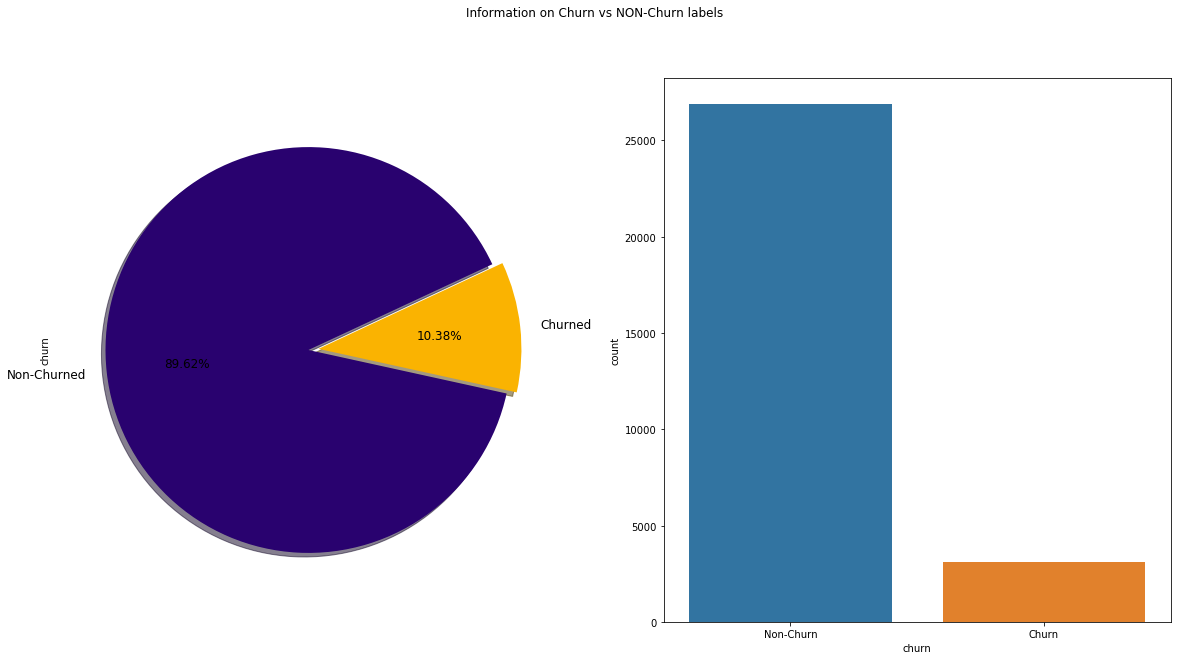

In [112]:

# Let's Visualise it

import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2,figsize=(20,10))

colors = ["#29026F", "#FAB301"]
labels = 'Non-Churned','Churned'
plt.suptitle('Information on Churn vs NON-Churn labels')
df.churn.value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax =ax[0], shadow = True,
                                    colors = colors, labels = labels, fontsize =12, startangle=25)
#ax[0].set_ylabel('% of ADR vs Non-ADR')

palette = ["#FAB301", "#29026F"]
sns.countplot(x='churn', data=df)
ax[1].set_xticklabels(['Non-Churn','Churn'],rotation=0, rotation_mode="anchor")
plt.show()

<Figure size 1296x720 with 0 Axes>

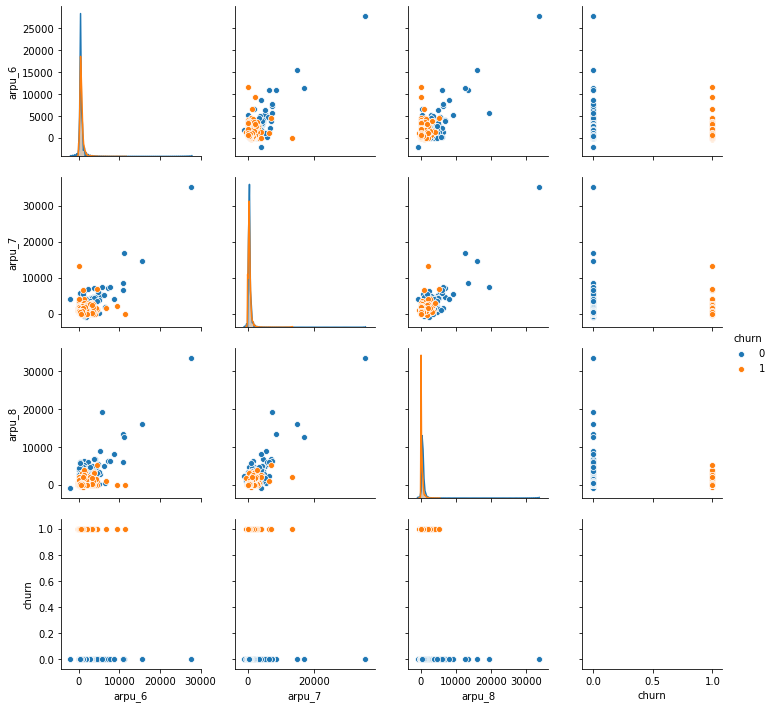

In [113]:
plt.figure(figsize = (18,10))
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')
# sns.pairplot(df,hue='churn')

In [114]:
df.fillna(0, inplace=True)
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_6_7,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,2419.030,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0,7/31/2014,8/23/2014,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,870.944,0
13,70

In [115]:
#df=data.drop(['url','phone'],axis=1)
#df = df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],axis=1)

In [124]:
#bool1 = pd.isnull(df['gamma1'])
#df.isnull().any()
df['date_of_last_rech_6'].value_counts()

1    29920
0       80
Name: date_of_last_rech_6, dtype: int64

In [128]:
df['date_of_last_rech_7'].value_counts()

1    29845
0      155
Name: date_of_last_rech_7, dtype: int64

In [129]:
df['date_of_last_rech_8'].value_counts()

1    29427
0      573
Name: date_of_last_rech_8, dtype: int64

 last date of recharge simply represents whether a recharge done in particular month or not so simply replace dates with 1 which indicates recharge done on particular month and other with 0 which indicates recharge was not done on that particular month 
and one can observe no charges per month incresase from 6th month to 8th month i.e(80 to 573) 

In [123]:
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].apply(lambda x: 0 if (x==0)  else 1)

In [131]:
X = df.drop('churn',axis=1)

In [274]:
X.head(2)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_6_7
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,1,1,1,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,2419.030
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,1,1,1,50,0,10,0,1,1,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,870.944


In [275]:
X.shape

(30000, 159)

In [132]:
y = df['churn']

# Feature selection

In [ ]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = X.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
X.drop(labels=corr_features, axis=1, inplace=True)

In [125]:
numerical_with_nan=[feature for feature in df.columns if df[feature].dtypes=='O']
print(numerical_with_nan)
for i in numerical_with_nan:
    df[i] = df[i].apply(lambda x: 0 if (x==0)  else 1)
    

['date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


### 1. Pearson Correlation

In [136]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,50)
print(str(len(cor_feature)), 'selected features')

50 selected features


In [138]:
print(cor_feature)

['total_ic_mou_6', 'total_og_mou_6', 'sachet_2g_8', 'loc_ic_t2m_mou_6', 'std_og_t2t_mou_8', 'fb_user_7', 'std_ic_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_6', 'loc_og_mou_6', 'aug_vbc_3g', 'loc_ic_mou_6', 'date_of_last_rech_data_7', 'monthly_2g_8', 'count_rech_2g_8', 'loc_og_t2f_mou_8', 'roam_og_mou_7', 'loc_ic_t2f_mou_8', 'std_og_t2t_mou_6', 'total_rech_data_8', 'std_og_t2m_mou_6', 'loc_og_t2t_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8', 'max_rech_data_8', 'onnet_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'total_ic_mou_7', 'date_of_last_rech_7', 'loc_og_t2m_mou_7', 'loc_ic_mou_7', 'loc_og_mou_7', 'std_og_mou_6', 'last_day_rch_amt_8', 'aon', 'max_rech_amt_8', 'fb_user_8', 'date_of_last_rech_data_8', 'offnet_mou_8', 'total_rech_num_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'arpu_8', 'total_rech_amt_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'date_of_last_rech_8']


Training dataset size (24000, 50)
Training dataset target size (24000,)
Test dataset size (6000, 50)
Test dataset target size (6000,)
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      5352
           1       0.43      0.78      0.56       648

    accuracy                           0.87      6000
   macro avg       0.70      0.83      0.74      6000
weighted avg       0.91      0.87      0.88      6000

Accuracy for the test dataset 86.57%
ROC for the test dataset 90.68%


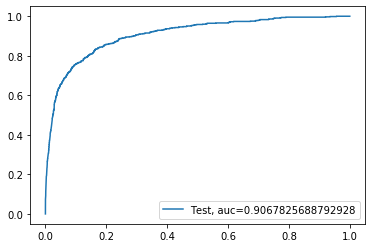

,value,colName
0,0.134363,isd_og_mou_7
1,0.116045,std_og_mou_7
2,0.115015,loc_og_t2c_mou_7
3,0.113778,std_og_mou_8
4,0.088391,spl_og_mou_6
5,0.080147,isd_og_mou_8
6,0.046189,loc_og_t2c_mou_6
7,0.044391,std_og_t2m_mou_6
8,0.038571,spl_og_mou_8
9,0.034057,std_og_mou_6


In [265]:
X2=df[cor_feature]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=98)

print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

TrainedRFC= RFC_balanced.fit(X_train,y_train)

preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:0.2%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.2%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

### 2. Chi-Squared

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=50)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

50 selected features


In [135]:
print(chi_feature)

['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'av_rech_amt_data_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g']


Training dataset size (24000, 50)
Training dataset target size (24000,)
Test dataset size (6000, 50)
Test dataset target size (6000,)
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      5352
           1       0.45      0.82      0.58       648

    accuracy                           0.87      6000
   macro avg       0.71      0.85      0.75      6000
weighted avg       0.92      0.87      0.89      6000

Accuracy for the test dataset 87.20%
ROC for the test dataset 91.99%


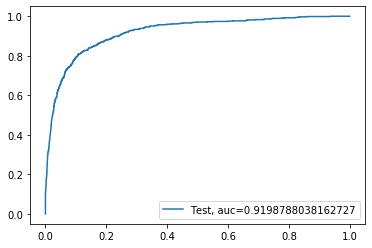

,value,colName
0,0.169553,loc_og_t2c_mou_8
1,0.149696,loc_og_t2f_mou_8
2,0.080688,roam_ic_mou_7
3,0.079821,loc_og_t2m_mou_8
4,0.069486,loc_og_t2m_mou_6
5,0.058462,arpu_6
6,0.048069,std_og_t2t_mou_7
7,0.047692,onnet_mou_7
8,0.047517,loc_og_t2c_mou_6
9,0.046441,loc_og_mou_7


In [267]:
X2=df[chi_feature]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=98)

print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

TrainedRFC= RFC_balanced.fit(X_train,y_train)

preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:0.2%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.2%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

### 3. Recursive Feature Elimination

In [259]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=50, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 159 features.
Fitting estimator with 149 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
Fitting estimator with 99 features.
Fitting estimator with 89 features.
Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
50 selected features


In [270]:
print(rfe_feature[:15])

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8']


Training dataset size (24000, 15)
Training dataset target size (24000,)
Test dataset size (6000, 15)
Test dataset target size (6000,)
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5352
           1       0.40      0.80      0.53       648

    accuracy                           0.85      6000
   macro avg       0.69      0.83      0.72      6000
weighted avg       0.91      0.85      0.87      6000

Accuracy for the test dataset 84.83%
ROC for the test dataset 89.90%


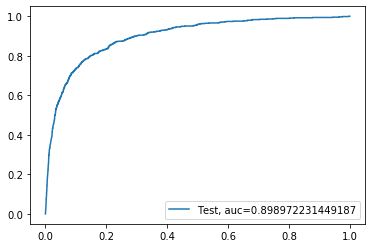

,value,colName
0,0.310300,roam_ic_mou_7
1,0.105977,onnet_mou_7
2,0.094972,offnet_mou_7
3,0.088868,arpu_6
4,0.087971,onnet_mou_6
5,0.064401,roam_ic_mou_6
6,0.063420,mobile_number
7,0.062763,offnet_mou_8
8,0.051617,offnet_mou_6
9,0.026379,roam_og_mou_6


In [271]:
X2=df[chi_feature[:15]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=98)

print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

TrainedRFC= RFC_balanced.fit(X_train,y_train)

preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:0.2%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.2%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

### 4. Lasso: SelectFromModel

In [142]:

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=50)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



50 selected features


In [261]:
print(embeded_lr_feature)

['arpu_6', 'onnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_t2f_mou_8', 'std_og_mou_7', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2m_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'date_of_last_rech_data_7', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_3g_7', 'fb_user_8', 'aon', 'aug_vbc_3g']


Training dataset size (24000, 50)
Training dataset target size (24000,)
Test dataset size (6000, 50)
Test dataset target size (6000,)
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      5352
           1       0.46      0.80      0.58       648

    accuracy                           0.88      6000
   macro avg       0.71      0.84      0.75      6000
weighted avg       0.92      0.88      0.89      6000

Accuracy for the test dataset 87.52%
ROC for the test dataset 90.98%


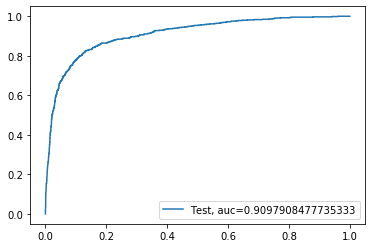

In [262]:
X2=df[embeded_lr_feature]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=98)

print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

TrainedRFC= RFC_balanced.fit(X_train,y_train)

preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:0.2%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.2%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### 5. Tree-based: SelectFromModel

In [145]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=50)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

50 selected features


In [146]:
print(embeded_rf_feature)

['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'arpu_6_7']


Training dataset size (24000, 50)
Training dataset target size (24000,)
Test dataset size (6000, 50)
Test dataset target size (6000,)
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5352
           1       0.43      0.83      0.56       648

    accuracy                           0.86      6000
   macro avg       0.70      0.85      0.74      6000
weighted avg       0.92      0.86      0.88      6000

Accuracy for the test dataset 86.12%
ROC for the test dataset 92.12%


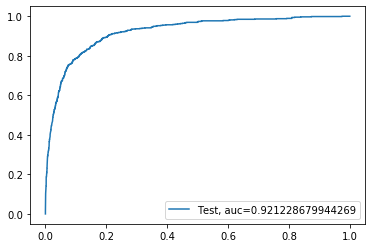

,value,colName
0,0.142933,loc_og_t2c_mou_6
1,0.093523,std_og_t2f_mou_8
2,0.088876,isd_og_mou_8
3,0.086933,std_og_t2m_mou_6
4,0.080108,loc_og_t2t_mou_8
5,0.077803,arpu_8
6,0.073723,loc_og_mou_8
7,0.067327,roam_ic_mou_7
8,0.059537,roam_og_mou_6
9,0.057317,loc_og_t2c_mou_8


In [264]:
X2=df[embeded_rf_feature]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=98)

print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

TrainedRFC= RFC_balanced.fit(X_train,y_train)

preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:0.2%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.2%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

In [276]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':X.columns, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(200)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,total_rech_num_8,True,True,True,True,True,5
2,total_og_mou_8,True,True,True,True,True,5
3,total_ic_mou_8,True,True,True,True,True,5
4,total_ic_mou_7,True,True,True,True,True,5
5,loc_og_t2m_mou_8,True,True,True,True,True,5
6,loc_og_mou_8,True,True,True,True,True,5
7,loc_ic_mou_8,True,True,True,True,True,5
8,last_day_rch_amt_8,True,True,True,True,True,5
9,aon,True,True,True,True,True,5
10,total_rech_data_8,True,True,True,True,False,4


In [248]:
feature_selection_df['Feature'][1]
columns=[]
Number_of_top_features_used_to_build_model = 70
for i in range(Number_of_top_features_used_to_build_model):
    k = feature_selection_df['Feature'][i+1]
    columns.append(k)
print(columns)

['total_rech_num_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_ic_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8', 'last_day_rch_amt_8', 'aon', 'total_rech_data_8', 'total_rech_amt_8', 'total_og_mou_6', 'total_ic_mou_6', 'std_og_t2m_mou_8', 'std_og_mou_8', 'std_og_mou_6', 'std_ic_mou_8', 'roam_og_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'monthly_2g_8', 'max_rech_amt_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'date_of_last_rech_8', 'av_rech_amt_data_8', 'aug_vbc_3g', 'total_rech_num_7', 'total_rech_num_6', 'total_og_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_mou_7', 'roam_og_mou_8', 'monthly_2g_7', 'loc_og_t2m_mou_7', 'loc_og_mou_7', 'fb_user_8', 'date_of_last_rech_data_7', 'count_rech_2g_8', 'arpu_8', 'arpu_6', 'std_og_t2t_mou_6', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'sachet_3g_7', 'sachet_2g_8', 'roam_og_mou_6', 'roam_ic_mou_7', 'onnet_mou_6', 'offnet_mou_7', 'monthly

In [249]:
X1=df[columns]

In [250]:
X1.head()

,total_rech_num_8,total_og_mou_8,total_ic_mou_8,total_ic_mou_7,loc_og_t2m_mou_8,loc_og_mou_8,loc_ic_mou_8,last_day_rch_amt_8,aon,total_rech_data_8,total_rech_amt_8,total_og_mou_6,total_ic_mou_6,std_og_t2m_mou_8,std_og_mou_8,std_og_mou_6,std_ic_mou_8,roam_og_mou_7,onnet_mou_8,offnet_mou_8,monthly_2g_8,max_rech_amt_8,loc_og_t2t_mou_8,loc_og_t2f_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_7,date_of_last_rech_8,av_rech_amt_data_8,aug_vbc_3g,total_rech_num_7,total_rech_num_6,total_og_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_mou_7,roam_og_mou_8,monthly_2g_7,loc_og_t2m_mou_7,loc_og_mou_7,fb_user_8,date_of_last_rech_data_7,count_rech_2g_8,arpu_8,arpu_6,std_og_t2t_mou_6,std_og_t2f_mou_8,spl_ic_mou_8,sachet_3g_7,sachet_2g_8,roam_og_mou_6,roam_ic_mou_7,onnet_mou_6,offnet_mou_7,monthly_2g_6,max_rech_data_8,max_rech_data_7,max_rech_amt_6,loc_og_t2m_mou_6,loc_og_mou_6,loc_ic_t2m_mou_6,loc_ic_mou_6,fb_user_7,date_of_last_rech_data_8,date_of_last_rech_7,date_of_last_rech_6,arpu_7,arpu_6_7
7,7,350.16,428.74,558.04,162.28,255.79,188.04,779,802,0.0,3638,487.53,626.46,49.14,77.84,60.86,193.94,12.59,52.29,325.91,0,1580,40.28,53.23,27.31,121.19,221.49,39.53,355.23,1,0.0,57.74,5,5,609.24,12.01,49.89,75.14,38.06,0,447.38,533.91,0.0,0,0.0,3171.480,1069.180,4.30,16.68,0.0,0,0,23.74,33.49,57.84,567.16,0,0.0,0.0,1580,308.63,422.16,217.56,427.88,0.0,0,1,1,1349.850,2419.030
8,14,171.56,16.54,28.49,50.54,63.04,15.79,10,315,3.0,120,508.36,103.86,75.69,98.28,130.26,0.75,0.00,35.08,136.48,0,30,12.49,0.00,0.31,15.48,13.98,0.00,23.83,1,69.0,21.03,21,19,431.66,22.58,13.69,143.48,0.00,1,70.58,288.18,1.0,1,3.0,137.362,378.721,116.56,0.00,0.0,0,3,0.00,0.00,413.69,80.63,0,23.0,154.0,90,80.96,378.09,57.58,81.43,1.0,1,1,1,492.223,870.944
13,11,1015.26,1144.53,172.58,294.46,353.99,255.26,0,2607,3.0,717,907.09,968.61,156.94,655.18,701.78,474.41,35.26,534.24,482.46,0,130,36.01,23.51,52.58,195.18,18.53,7.49,26.11,1,69.0,0.00,4,6,192.41,498.23,255.36,138.93,1.44,0,47.28,53.48,1.0,0,3.0,593.260,492.846,446.41,0.00,0.0,0,3,7.98,144.24,501.76,119.28,0,23.0,0.0,110,151.13,205.31,142.88,215.58,0.0,1,1,1,205.671,698.517
16,2,233.38,294.46,381.56,128.28,205.93,211.78,130,511,0.0,160,346.81,364.86,18.29,21.53,30.89,82.44,17.74,70.61,162.76,0,130,67.38,10.26,28.89,150.16,149.69,32.71,229.83,1,0.0,0.00,6,10,286.01,3.23,22.99,67.09,0.00,0,145.99,215.64,0.0,0,0.0,187.894,430.975,7.89,0.00,0.0,0,0,0.00,2.83,50.51,229.74,0,0.0,0.0,110,273.29,315.91,226.81,276.86,0.0,0,1,1,299.869,730.844
17,4,0.00,0.00,2.31,0.00,0.00,0.00,0,667,0.0,30,1249.53,91.88,0.00,0.00,1148.46,0.00,8.46,7.79,5.54,0,30,0.00,0.00,0.00,0.00,2.31,0.00,2.31,1,0.0,0.00,2,19,0.81,0.00,1.55,0.81,13.34,0,0.00,0.00,0.0,0,0.0,25.499,690.008,1146.91,0.00,0.0,0,0,0.00,4.76,1185.91,0.00,0,0.0,0.0,110,58.54,97.54,47.41,81.96,0.0,0,1,1,18.980,708.988


## Feature Scaling

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X1)


In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=98)

In [253]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (24000, 70)
Training dataset target size (24000,)
Test dataset size (6000, 70)
Test dataset target size (6000,)


In [254]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [255]:

import warnings
warnings.filterwarnings("ignore")

In [256]:
TrainedRFC= RFC_balanced.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5352
           1       0.45      0.82      0.58       648

    accuracy                           0.87      6000
   macro avg       0.71      0.85      0.75      6000
weighted avg       0.92      0.87      0.89      6000

Accuracy for the test dataset 87.28%
ROC for the test dataset 92.10%


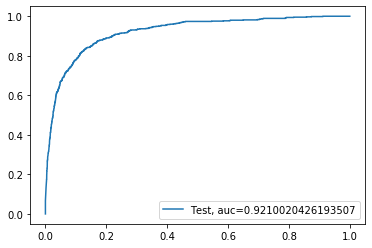

In [257]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:0.2%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.2%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [258]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.224513,arpu_7
1,0.096775,loc_og_t2c_mou_6
2,0.081323,isd_og_mou_8
3,0.072567,onnet_mou_6
4,0.069843,loc_og_t2f_mou_6
5,0.063084,roam_ic_mou_6
6,0.054323,std_og_t2f_mou_7
7,0.046079,loc_og_t2t_mou_6
8,0.043207,offnet_mou_6
9,0.036015,loc_og_t2f_mou_7


## Gradient boosting

In [277]:
from sklearn import ensemble

# Fit classifier with out-of-bag estimates
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [279]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=9999, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5352
           1       0.68      0.42      0.52       648

    accuracy                           0.92      6000
   macro avg       0.80      0.70      0.74      6000
weighted avg       0.91      0.92      0.91      6000

Accuracy for the test dataset 91.6%
ROC for the test dataset 89.4%


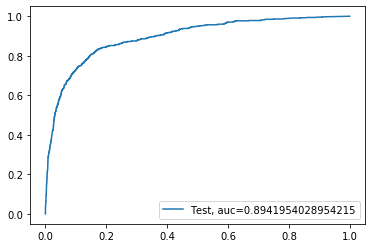

In [280]:
y_pred = GBC.predict(X_test)
y_pred_probs_GBC = GBC.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

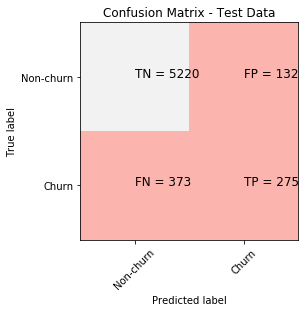

In [282]:
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()